In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
loan_data = pd.read_csv('Loan Modelling Thera Bank.csv')
loan_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
loan_data.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
loan_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
sns.pairplot(loan_data,
             hue = 'Personal Loan',
            vars =   ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
                     'Education', 'Mortgage', 'Securities Account',
                     'CD Account', 'Online', 'CreditCard'])

<Axes: ylabel='count'>

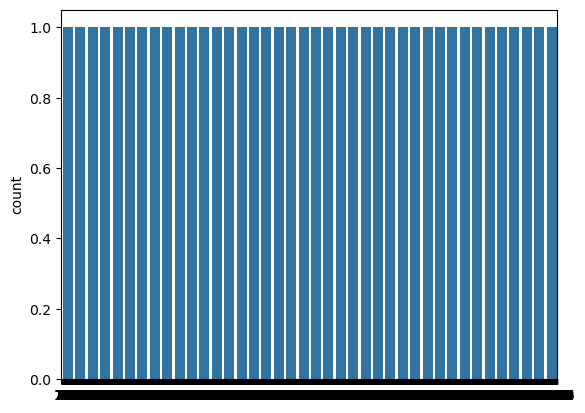

In [9]:
sns.countplot(loan_data['Personal Loan'])

<Axes: >

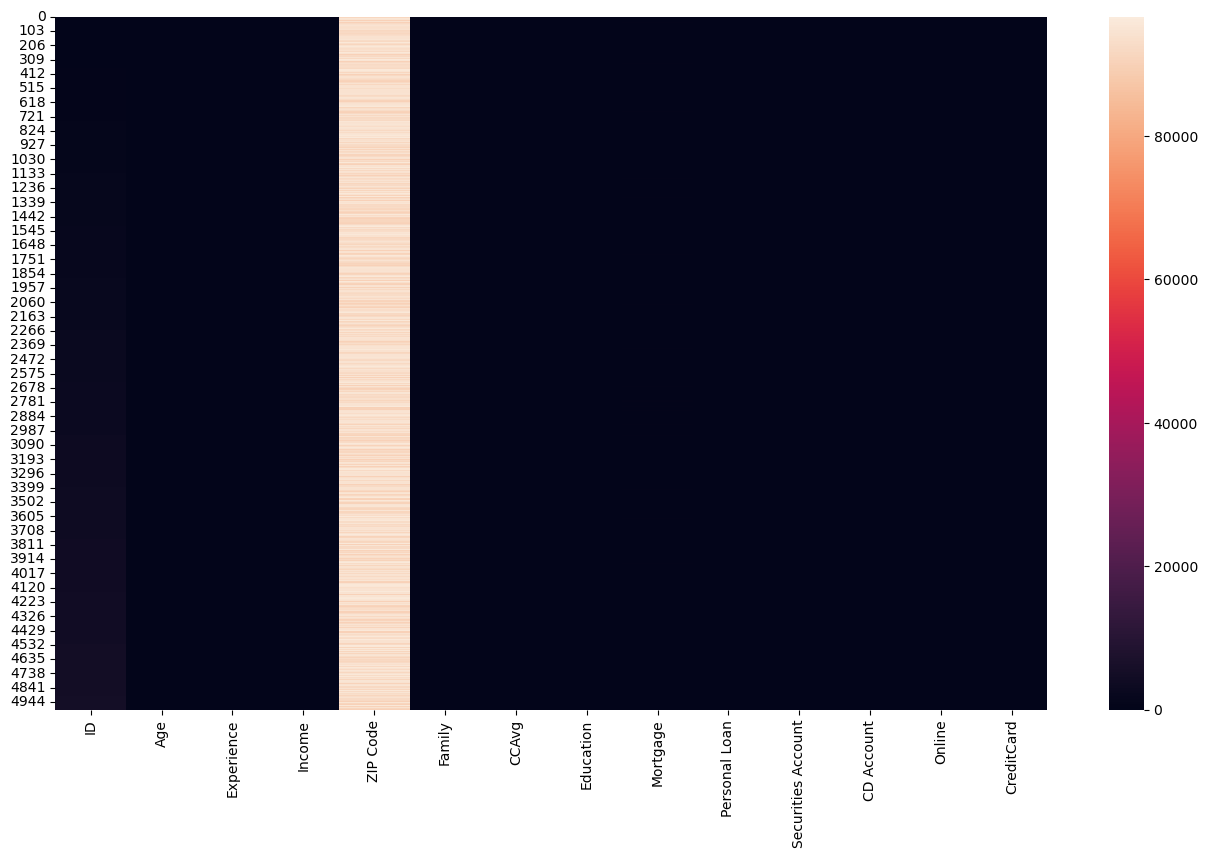

In [10]:
plt.figure(figsize = (16, 9))
sns.heatmap(loan_data)

<Axes: >

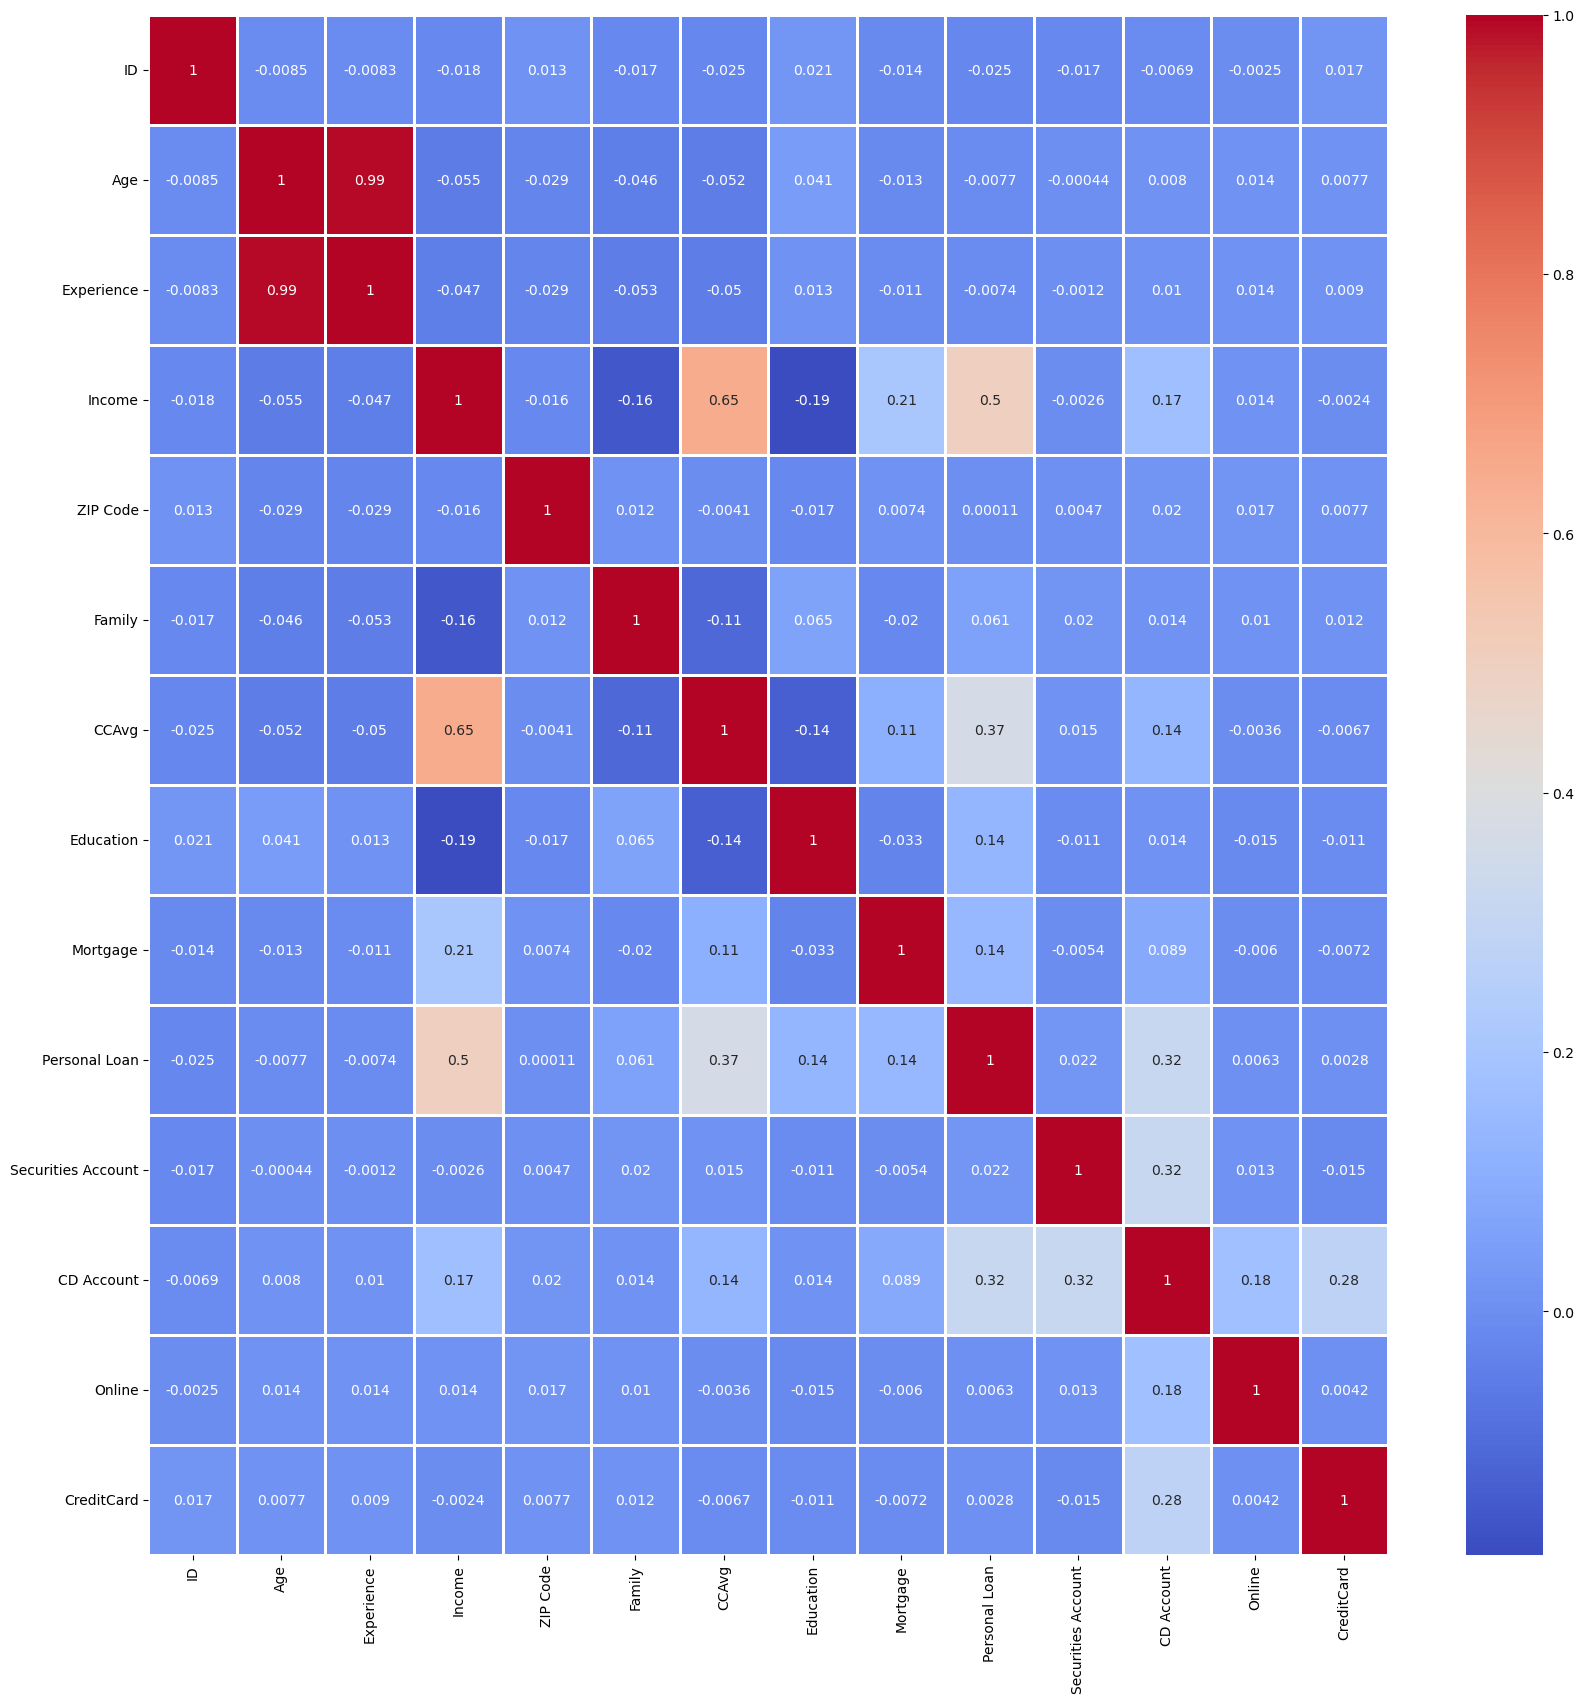

In [11]:
plt.figure(figsize = (20, 20))
sns.heatmap(loan_data.corr(), annot = True, cmap = 'coolwarm', linewidth = 2)

In [12]:
X = loan_data.drop(['ID', 'Personal Loan'], axis = 1)
X = (X - X.min()) / (X.max() - X.min())
#min-max scaling
X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.000000,1.0,0.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.000000,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.000000,0.0,0.0,0.0,0.0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.148148,0.954731,0.000000,0.19,1.0,0.000000,0.0,0.0,1.0,0.0
4996,0.159091,0.152174,0.032407,0.947174,1.000000,0.04,0.0,0.133858,0.0,0.0,1.0,0.0
4997,0.909091,0.913043,0.074074,0.958463,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0
4998,0.954545,0.934783,0.189815,0.924242,0.666667,0.05,0.5,0.000000,0.0,0.0,1.0,0.0


In [13]:
X.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.507691,0.502274,0.304510,0.959946,0.465467,0.193794,0.440500,0.088974,0.104400,0.06040,0.596800,0.294000
std,0.260526,0.249303,0.213119,0.024293,0.382554,0.174766,0.419935,0.160179,0.305809,0.23825,0.490589,0.455637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.272727,0.282609,0.143519,0.945732,0.000000,0.070000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,0.500000,0.259259,0.963203,0.333333,0.150000,0.500000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.727273,0.717391,0.416667,0.976610,0.666667,0.250000,1.000000,0.159055,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: >

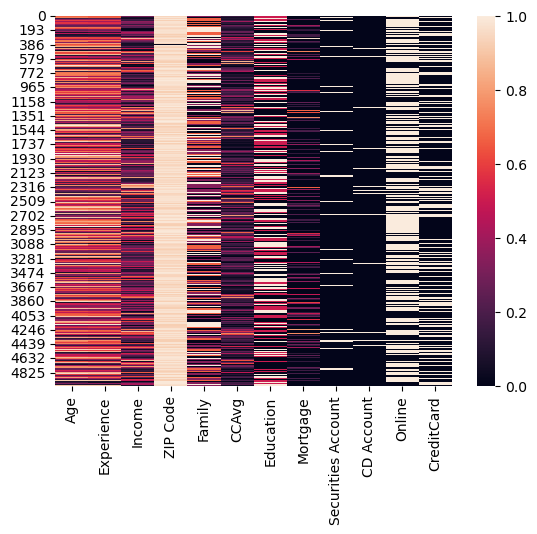

In [14]:
sns.heatmap(X)

In [15]:
y = loan_data['Personal Loan']
y[y != 0]

9       1
16      1
18      1
29      1
38      1
       ..
4883    1
4927    1
4941    1
4962    1
4980    1
Name: Personal Loan, Length: 480, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4000, 12) (1000, 12)
(4000,) (1000,)


In [67]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def cal(x):
    knn_classifier = KNeighborsClassifier(n_neighbors = x, metric = 'minkowski', p = 2, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

Text(0.5, 1.0, 'Ảnh hưởng của số lượng láng giềng')

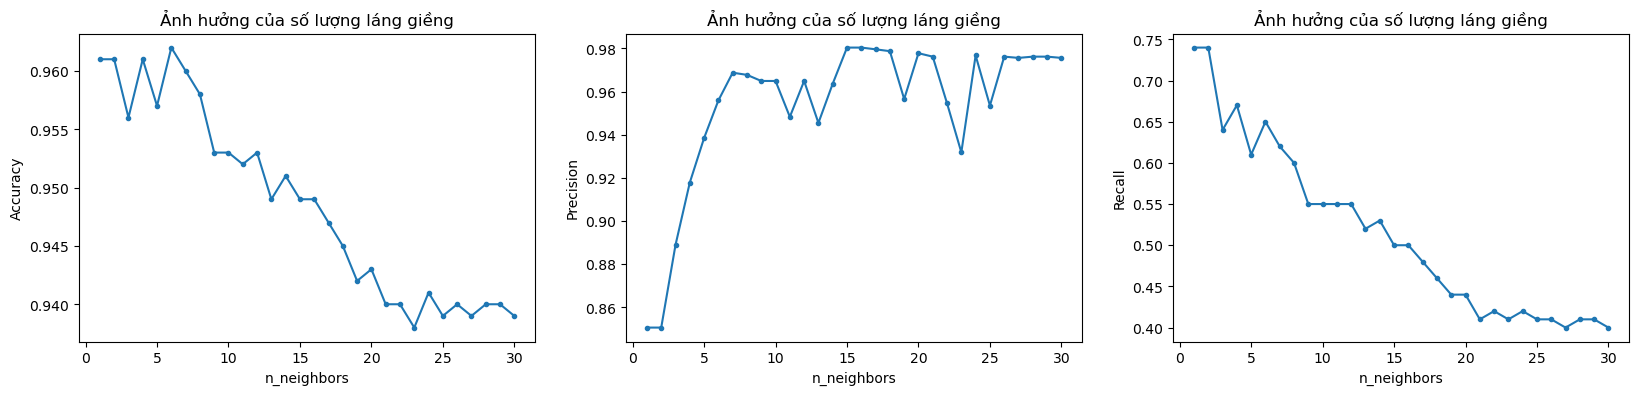

In [106]:
n_neighbors = [i for i in range(1, 31)]

acc = []
pre = []
rec = []

for i in n_neighbors:
    x, y, z = cal(i)
    acc.append(x)
    pre.append(y)
    rec.append(z)

fig, axs = plt.subplots(1, 3, figsize = (20, 4))
axs[0].plot(n_neighbors, acc, marker= ".")
axs[0].set_xlabel("n_neighbors")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Ảnh hưởng của số lượng láng giềng")
axs[1].plot(n_neighbors, pre, marker= ".")
axs[1].set_xlabel("n_neighbors")
axs[1].set_ylabel("Precision")
axs[1].set_title("Ảnh hưởng của số lượng láng giềng")
axs[2].plot(n_neighbors, rec, marker= ".")
axs[2].set_xlabel("n_neighbors")
axs[2].set_ylabel("Recall")
axs[2].set_title("Ảnh hưởng của số lượng láng giềng")

In [107]:
acc = []
pre = []
cal = []

keys = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
        'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']



SyntaxError: invalid character '‘' (U+2018) (629976670.py, line 5)